<a href="https://colab.research.google.com/github/beliaazzhr/beliaazzhr-Automated-Machine-Learning-Using-TPOT/blob/main/TubesML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # Tugas Besar 1 Pembelajaran Mesin Lanjut
###Anggota Kelompok :

1. Anyelir Belia Azzahra - 1301200048

#Eksplorasi Data

##Eksplorasi Data menggunakan KNN

In [36]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
#import sklearn
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [8]:
df = pd.read_csv('train.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,9112594,B,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
459,9112712,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.0719,0.04866,0.2321,0.07211
460,911296201,M,17.080,27.15,111.20,930.9,0.09898,0.11100,0.1007,0.06431,...,22.96,34.49,152.10,1648.0,0.1600,0.2444,0.2639,0.1555,0.3010,0.09060
461,911296202,M,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.3635,0.1689,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean              object
concave points_mean         object
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se                object
concave points_se           object
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

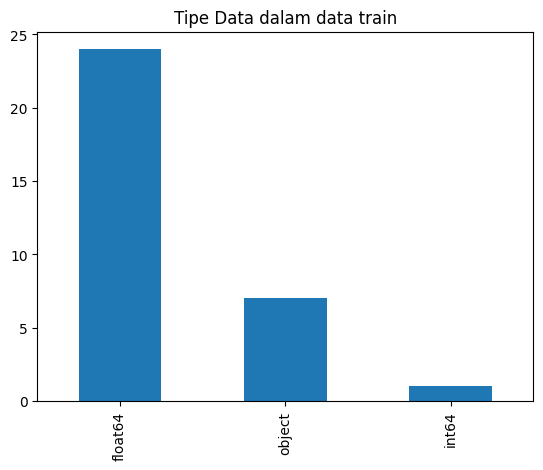

In [9]:
#menampilkan tipe data
dt = df.dtypes.value_counts()
dt = dt.plot.bar()
dt.set_title("Tipe Data dalam data train")
dt.plot()
df.dtypes

In [14]:
#mengubah string menjadi numerik
df["diagnosis"] = df["diagnosis"].replace('M', 1)
df["diagnosis"] = df["diagnosis"].replace('B', 0)

In [18]:
# Mengubah data yang berisi '?' menjadi null
df = df.replace('?',np.NaN)

In [19]:
# Menampilkan kolom pada dataset 
print("Kolom :", df.columns, "\n")

# Menampilkan data yang duplikat
print("Duplikat :", df.duplicated().sum(), "\n")

# Menampilkan data yang kosong 
print(df.isnull().sum())

Kolom : Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object') 

Duplikat : 0 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             7
concave points_mean        7
symmetry_mean              0
fracta

In [20]:
# #menambahkan data null
# null = []
# for i in df:
#   value = []
#   if df[i].isna().sum() > 0:
#     null.append(i)

In [23]:
# Mengisi data kosong dengan knn imputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df[:] = imputer.fit_transform(df)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,1.0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517.0,1.0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903.0,1.0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301.0,1.0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402.0,1.0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,9112594.0,0.0,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
459,9112712.0,0.0,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.07190,0.04866,0.2321,0.07211
460,911296201.0,1.0,17.080,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,...,22.96,34.49,152.10,1648.0,0.1600,0.2444,0.26390,0.15550,0.3010,0.09060
461,911296202.0,1.0,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.68330,0.26250,0.2641,0.07427


In [30]:
#Split Data
df_x = df.drop(labels=['diagnosis', 'id'], axis=1)
df_y = df["diagnosis"]
X_train,X_test,Y_train,Y_test=train_test_split(df_x,df_y,test_size=0.75)
print("jumlah data train :",len(X_train))
print("jumlah data tes :",len(X_test)) 
     

jumlah data train : 115
jumlah data tes : 348


#Pemodelan Data

In [39]:
#Pemodelan Data menggunakan TPOT
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, Y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9826086956521738

Generation 2 - Current best internal CV score: 0.9826086956521738

Generation 3 - Current best internal CV score: 0.9826086956521738

Generation 4 - Current best internal CV score: 0.9826086956521738

Generation 5 - Current best internal CV score: 0.9826086956521738

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=6, max_features=0.8500000000000001, min_samples_leaf=9, min_samples_split=20, n_estimators=100, subsample=0.9000000000000001)


TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2)

In [41]:
#untuk melihat akurasi score menggunakan KNN imputer
print(tpot.score(X_test, Y_test))

0.9367816091954023


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [42]:
tpot.export('tpot_hasil_pipeline.py')